<a href="https://colab.research.google.com/github/tcbic/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Taylor%20Bickell_Unit_1_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
#Upload sales data.

from google.colab import files
uploaded = files.upload()

Saving official_eBay Sales Data_June_17_June_18.csv to official_eBay Sales Data_June_17_June_18.csv


In [0]:
import io

full_sales_year = pd.read_csv(io.BytesIO(uploaded['official_eBay Sales Data_June_17_June_18.csv']))

In [0]:
#Only interested in clothing sales...

full_sales_year = full_sales_year[full_sales_year['Item Category'] != 'Other']

full_sales_year['Item Category'].count()

2905

In [0]:
#Time Series

full_sales_year['Sale Date'] = pd.to_datetime(full_sales_year['Sale Date'])

#Check for conversion.

full_sales_year.dtypes

Sale Date                   datetime64[ns]
Buyer State                         object
Quantity                             int64
Mens, Womens or Children            object
Size                                object
Print                               object
Brand                               object
Item Category                       object
Item Sale Price                    float64
Listing Format                      object
NWT or Pre Owned                    object
dtype: object

In [0]:
full_sales_year = full_sales_year.set_index('Sale Date')

In [0]:
#Add these columns to our DataFrame for additional exploration purposes.

full_sales_year['Year'] = full_sales_year.index.year
full_sales_year['Month'] = full_sales_year.index.month
full_sales_year['Weekday Name'] = full_sales_year.index.weekday_name

In [0]:
#View data...

full_sales_year.head()

,Buyer State,Quantity,"Mens, Womens or Children",Size,Print,Brand,Item Category,Item Sale Price,Listing Format,NWT or Pre Owned,Year,Month,Weekday Name
Sale Date,,,,,,,,,,,,,
2017-06-20,CA,1,M,Med,Pattern,Bonobos,Casual Shirts,16.00,Fixed,Pre-Owned,2017,6,Tuesday
2017-06-21,MN,1,M,Med,Solid,5.11 Tactical,Casual Shirts,18.70,Fixed,Pre-Owned,2017,6,Wednesday
2017-06-21,SC,1,M,Med,Pattern,Tommy Bahama,Shorts,10.00,Fixed,Pre-Owned,2017,6,Wednesday
2017-06-21,AR,1,M,Med,Pattern,O'Neill,Shorts,4.15,Auction,Pre-Owned,2017,6,Wednesday
2017-06-21,PA,1,M,XL,Pattern,Banana Republic,Casual Shirts,0.99,Auction,Pre-Owned,2017,6,Wednesday


In [0]:
full_sales_year = full_sales_year.drop(columns=['Buyer State', 'Mens, Womens or Children', 'Size', 'Print', 'Brand', 'Item Category', 'Listing Format', 
                                  'NWT or Pre Owned', 'Year', 'Month', 'Weekday Name'])

In [0]:
#Create a copy of the DataFrame.

full = full_sales_year.copy()

In [0]:
full = full.resample('M').sum()

In [0]:
full = full.rename(columns={'Quantity':'Number of Items Sold', 'Item Sale Price':'Total Sales'})

In [0]:
full.index = full.index.strftime('%b %Y')

In [0]:
full.head()

,Number of Items Sold,Total Sales
Jun 2017,41,984.43
Jul 2017,156,4232.98
Aug 2017,214,6231.05
Sep 2017,151,4650.53
Oct 2017,218,5227.56


In [0]:
#Seasonal date ranges

#Summer 2017: 6/20 - 9/22

#Fall 2017: 9/22 - 12/21

#Winter 2017/2018: 12/21 - 3/20

#Spring 2018: 3/20 - 6/21

#Q4 2017: 10/1 - 12/31 

In [0]:
#Summer 2017

summer_17 = full_sales_year['2017-06-20':'2017-09-21']

summer_17.head()

,Quantity,Item Sale Price
Sale Date,,
2017-06-20,1,16.00
2017-06-21,1,18.70
2017-06-21,1,10.00
2017-06-21,1,4.15
2017-06-21,1,0.99


In [0]:
summer_17 = summer_17.resample('D').sum()

In [0]:
summer_17.head()

,Quantity,Item Sale Price
Sale Date,,
2017-06-20,1,16.00
2017-06-21,4,33.84
2017-06-22,3,89.40
2017-06-23,1,34.00
2017-06-24,4,100.10


In [0]:
summer_17.index = summer_17.index.strftime('%b %d %Y')

In [0]:
summer_17 = summer_17.reset_index()

In [0]:
summer_17 = summer_17.rename(columns={'index':'Day', 'Quantity':'Number of Items Sold', 'Item Sale Price':'Total Sales'})

In [0]:
summer_17.describe()

,Number of Items Sold,Total Sales
count,94.000000,94.000000
mean,5.659574,162.356489
std,2.600882,92.696028
min,1.000000,16.000000
25%,4.000000,97.092500
50%,5.500000,149.945000
75%,7.000000,209.267500
max,12.000000,478.300000


In [0]:
#Fall 2017

fall_17 = full_sales_year['2017-09-22':'2017-12-20']

In [0]:
fall_17 = fall_17.resample('D').sum()

In [0]:
fall_17.index = fall_17.index.strftime('%b %d %Y')

In [0]:
fall_17 = fall_17.reset_index()

In [0]:
fall_17 = fall_17.rename(columns={'index':'Day', 'Quantity':'Number of Items Sold', 'Item Sale Price':'Total Sales'})

In [0]:
fall_17.head()

,Day,Number of Items Sold,Total Sales
0,Sep 22 2017,4,88.80
1,Sep 23 2017,3,67.20
2,Sep 24 2017,1,40.00
3,Sep 25 2017,6,129.34
4,Sep 26 2017,2,84.00


In [0]:
#Winter 2017/2018

winter17_18 = full_sales_year['2017-12-21':'2018-03-19']

In [0]:
winter17_18 = winter17_18.resample('D').sum()

In [0]:
winter17_18.index = winter17_18.index.strftime('%b %d %Y')

In [0]:
winter17_18 = winter17_18.reset_index()

In [0]:
winter17_18 = winter17_18.rename(columns={'index':'Day', 'Quantity':'Number of Items Sold', 'Item Sale Price':'Total Sales'})

In [0]:
winter17_18.tail()

,Day,Number of Items Sold,Total Sales
84,Mar 15 2018,5,151.48
85,Mar 16 2018,9,172.00
86,Mar 17 2018,11,249.93
87,Mar 18 2018,7,188.96
88,Mar 19 2018,4,156.99


In [0]:
#Spring 2018

spring_18 = full_sales_year['2018-03-20':'2018-06-20']

In [0]:
spring_18 = spring_18.resample('D').sum()

In [0]:
spring_18.index = spring_18.index.strftime('%b %d %Y')

In [0]:
spring_18 = spring_18.reset_index()

In [0]:
spring_18 = spring_18.rename(columns={'index':'Day', 'Quantity':'Number of Items Sold', 'Item Sale Price':'Total Sales'})

In [0]:
spring_18.head()

,Day,Number of Items Sold,Total Sales
0,Mar 20 2018,1,14.99
1,Mar 21 2018,1,12.00
2,Mar 22 2018,1,54.99
3,Mar 23 2018,3,122.04
4,Mar 24 2018,4,209.00


In [0]:
#Q4 2017 (10/1 - 12/31)

q4_17 = full_sales_year['2017-10-01':'2017-12-31']

In [0]:
q4_17 = q4_17.resample('D').sum()

In [0]:
q4_17.index = q4_17.index.strftime('%b %d %Y')

In [0]:
q4_17 = q4_17.reset_index()

In [0]:
q4_17 = q4_17.rename(columns={'index':'Day', 'Quantity':'Number of Items Sold', 'Item Sale Price':'Total Sales'})

In [0]:
#Now for some visuals...

In [0]:
import matplotlib.pyplot as plt

In [0]:
#An additional copy to experiment with a plot...

full1 = full.copy()

In [0]:
full1 = full1.reset_index()

In [0]:
full1 = full1.rename(columns={'index':'Sale Date'})

In [0]:
full1.head()

,Sale Date,Number of Items Sold,Total Sales
0,Jun 2017,41,984.43
1,Jul 2017,156,4232.98
2,Aug 2017,214,6231.05
3,Sep 2017,151,4650.53
4,Oct 2017,218,5227.56


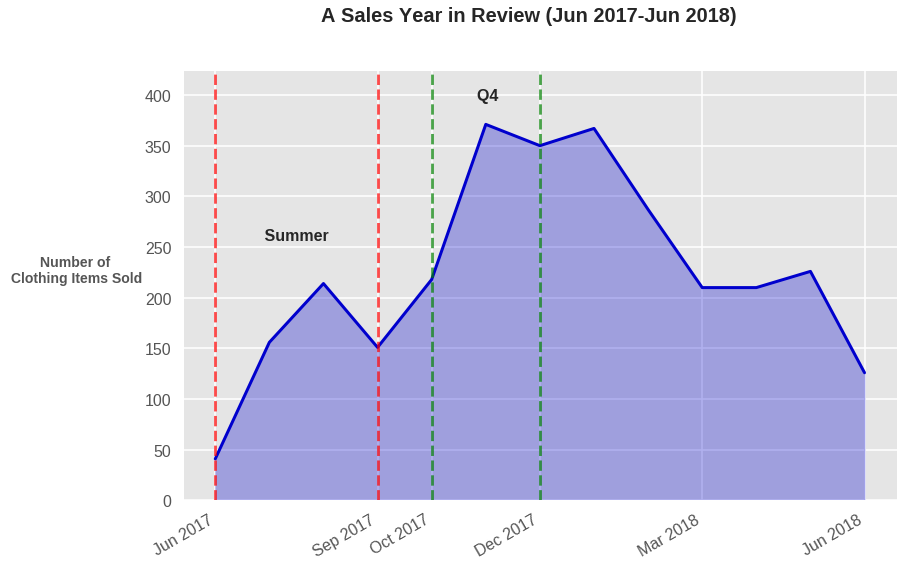

In [0]:
#Visualization 1

fig, ax = plt.subplots()

plt.style.use('ggplot')

plt.plot(full1['Sale Date'], full1['Number of Items Sold'], linewidth=3, color='mediumblue')
plt.fill_between(x=full1['Sale Date'], y1=full1['Number of Items Sold'], alpha=.3, color='mediumblue') 

plt.axvline('Jun 2017', linestyle='dashed', alpha=0.7, color='red')
plt.axvline('Sep 2017', linestyle='dashed', alpha=0.7, color='red')
plt.text('Jun 2017', y=240, s='           Summer\n', fontsize=16, weight='bold') #Select a different 'summery' color. #Maybe no Slowdown.
plt.axvline('Oct 2017', linestyle='dashed', alpha=0.7, color='green') 
plt.axvline('Dec 2017', linestyle='dashed', alpha=0.7, color='green')
#ax.set_facecolor('lightgrey') #If you wanted to change the facecolor of the grid.
#plt.axvspan('Sep 2017', 'Dec 2017', alpha=0.2, color='skyblue') #Adding a highlighted portion of the graph.
plt.text('Oct 2017', y=395, s='          Q4', weight='bold', fontsize=16)
fig.suptitle('A Sales Year in Review (Jun 2017-Jun 2018)', fontsize=20, weight='bold')
#plt.xlabel('Month of the Year', fontsize=12, weight='bold') #Adding an xlabel.
plt.ylabel('Number of\n Clothing Items Sold', rotation=0, labelpad=70, fontsize=14, weight='bold') 
plt.ylim(0, 425)
plt.xticks(['Jun 2017', 'Sep 2017', 'Oct 2017', 'Dec 2017', 'Mar 2018', 'Jun 2018'])
fig.autofmt_xdate();

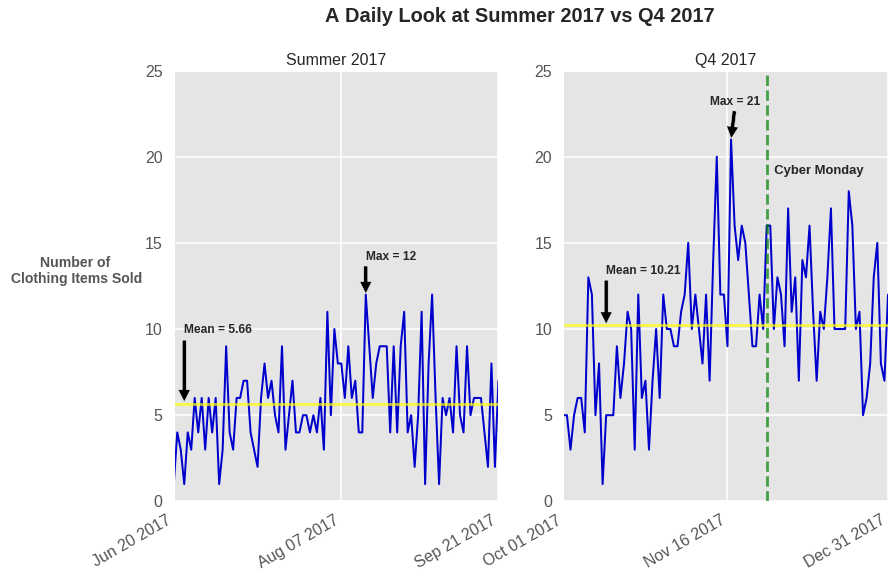

In [0]:
#Visualization 2

#A Close Up: Summer 17 vs Q4 17

fig, (ax1, ax2) = plt.subplots(1, 2, sharex = False, sharey=False)
plt.style.use('ggplot')
fig.suptitle('A Daily Look at Summer 2017 vs Q4 2017', fontsize=20, weight='bold')
ax1.plot(summer_17['Day'], summer_17['Number of Items Sold'], linewidth=2, color='mediumblue')
ax1.plot()
ax1.set_ylim(0, 25)
ax1.set_xlim('Jun 20 2017','Sep 21 2017')
ax1.set_ylabel('Number of\n Clothing Items Sold', rotation=0, labelpad=70, fontsize=14, weight='bold')
ax1.set_title('Summer 2017', fontsize=16)
ax1.set_xticks(['Jun 20 2017', 'Aug 07 2017', 'Sep 21 2017'])
ax1.annotate('Max = 12', weight='bold', fontsize=12, xy=('Aug 14 2017', 12), xytext=('Aug 14 2017', 12+2),
            arrowprops=dict(facecolor='black', shrink=0.03),
            )
ax1.annotate('Mean = 5.66', weight='bold', fontsize=12, xy=('Jun 23 2017', 5.66), xytext=('Jun 23 2017', 5.66+4.1),
            arrowprops=dict(facecolor='black', shrink=0.03),
            )
ax1.axhline(5.66, alpha=0.7, color='yellow')
ax2.plot(q4_17['Day'], q4_17['Number of Items Sold'], linewidth=2, color='mediumblue')

ax2.annotate('Max = 21', weight='bold', fontsize=12, xy=('Nov 17 2017', 21), xytext=('Nov 11 2017', 21+2),
            arrowprops=dict(facecolor='black', shrink=0.03),
            )
ax2.annotate('Mean = 10.21', weight='bold', fontsize=12, xy=('Oct 13 2017', 10.21), xytext=('Oct 13 2017', 10.21+3),
            arrowprops=dict(facecolor='black', shrink=0.03),
            )
ax2.axvline('Nov 27 2017', linestyle='dashed', alpha=0.7, color='green')
ax2.axhline(10.21, alpha=0.7, color='yellow')
ax2.text('Nov 27 2017', y=19, s='  Cyber Monday', fontsize=13, weight='bold')
ax2.set_title('Q4 2017', fontsize=16)
ax2.set_ylim(0, 25)
ax2.set_xlim('Oct 01 2017', 'Dec 31 2017')
ax2.set_xticks(['Oct 01 2017', 'Nov 16 2017', 'Dec 31 2017'])
fig.autofmt_xdate();

In [0]:
#Descriptive statistics for Summer 2017

sum_des = summer_17.drop(columns=['Total Sales'])

sum_des.describe()

,Number of Items Sold
count,94.000000
mean,5.659574
std,2.600882
min,1.000000
25%,4.000000
50%,5.500000
75%,7.000000
max,12.000000


In [0]:
#Descriptive statistics for Q4 2017

q4_des = q4_17.drop(columns=['Total Sales'])

q4_des.describe()

,Number of Items Sold
count,92.000000
mean,10.206522
std,4.015186
min,1.000000
25%,7.000000
50%,10.000000
75%,12.250000
max,21.000000
